In [1]:
import analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hmaps = analysis.NN_heatmaps()
hmaps.hmaps()
hmaps.convert_numpy()
hmaps.accuracy_results()
learning_rate_ = [0.001, 0.003, 0.005, 0.01, 0.03]
keep_prob_ = [0.7, 0.8, 0.85, 0.9, 0.95]

# Gridsearch 

Trained 2 and 3 layer networks, fully connected, with sigmoid activation. The networks combined hyperparameters, 5 for dropout and 5 for the learning rate, resulting in 25 models for the 2 and 3 layer respectively. Heatmaps were ploted for the maximum accuracy of each of the models and for each, a matrix of the training steps at which the maximum accuracy was found (used to find at which step each of the model starts to overfit). <br><br>
The validation (test set) and train set were splitted at the begining, with test set containing 30% of the training dataset, with 70% left for training.

## Model parameters (matrices for each layer)

#### - 2 layer model:
    - First layer: $264 \times 264$
    - Second layer: $264 \times 10$
#### - 3 layer model:
    - First layer: $264 \times 528$
    - Second layer: $528 \times 264$
    - Thrird layer: $264 \times 10$

### Each of the above two models was trained on the following hyperparameters (every combination of those):
- Dropout: [0.3, 0.2, 0.15, 0.1, 0.05]
- Learning rate: [0.001, 0.003, 0.005, 0.01, 0.03]

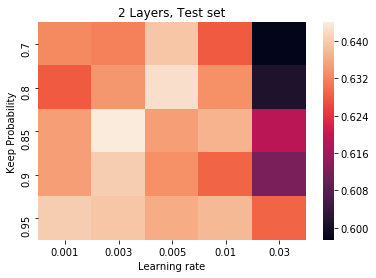

[[4800 2600 2000 1700 4800]
 [3000 3100 1800 1800 2000]
 [4500 2000 1600 1400 2100]
 [4800 2500 1000 1300  700]
 [4900 2100 2000 2200 1400]]


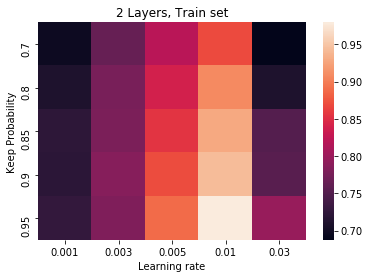

[[4900 4900 4900 4900 4700]
 [4900 4600 4900 4900 4500]
 [4800 4700 4700 4900 4900]
 [4400 4900 4900 4600 4800]
 [4900 4700 4900 4900 4200]]


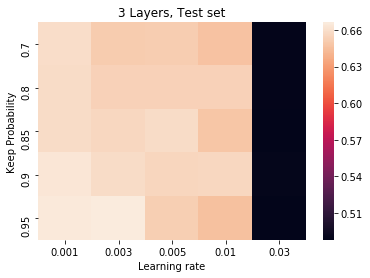

[[4500 3200 1600 4300  800]
 [4900 2100  900 1900  500]
 [4200 2500 1200 3500  500]
 [2700 1800 1000 2200 3100]
 [3500 2000 1700 1600  500]]


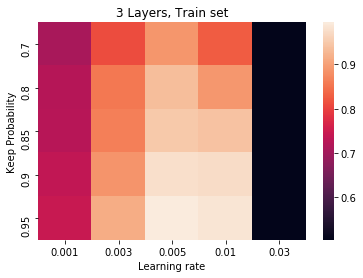

[[4800 4900 4900 4800 3100]
 [4900 4900 4900 4800  800]
 [4800 4800 4900 4700  500]
 [4800 4800 4900 4700  500]
 [4900 4900 4900 4800 1100]]


In [3]:
sns.heatmap(hmaps.heat_map_2_test[:5,:],xticklabels=learning_rate_,yticklabels=keep_prob_)
plt.title("2 Layers, Test set")
plt.xlabel("Learning rate")
plt.ylabel("Keep Probability")
plt.show()
print(hmaps.heat_map_2_test_steps[:5,:])
sns.heatmap(hmaps.heat_map_2_train[:5,:],xticklabels=learning_rate_,yticklabels=keep_prob_)
plt.title("2 Layers, Train set")
plt.xlabel("Learning rate")
plt.ylabel("Keep Probability")
plt.show()
print(hmaps.heat_map_2_train_steps[:5,:])

sns.heatmap(hmaps.heat_map_3_test[:5,:],xticklabels=learning_rate_,yticklabels=keep_prob_)
plt.title("3 Layers, Test set")
plt.xlabel("Learning rate")
plt.ylabel("Keep Probability")
plt.show()
print(hmaps.heat_map_3_test_steps[:5,:])
sns.heatmap(hmaps.heat_map_3_train[:5,:],xticklabels=learning_rate_,yticklabels=keep_prob_)
plt.title("3 Layers, Train set")
plt.xlabel("Learning rate")
plt.ylabel("Keep Probability")
plt.show()
print(hmaps.heat_map_3_train_steps[:5,:])

## Choosing the models
Out of the models above, one for each number of layers was chosen (2 and 3 layers), based on which had the higher test accuracy:
- 2 layer: keep_probability=0.85 (equivalent to dropout 0.15) and learning_rate= 0.003, trained for 2000 steps
- 3 layer: keep_probability=0.95 (equivalent to dropout 0.05) and learning_rate= 0.001, trained for 3500 steps

Train and test set accuracies were ploted as a function of the number of steps

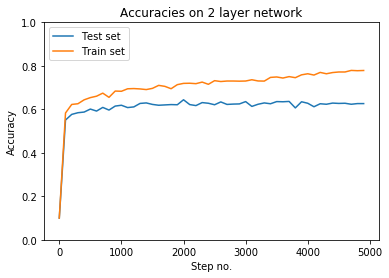

In [4]:
indexes = np.linspace(0,49,50)*100
hmaps.test_accuracy_2L.shape
hmaps.train_accuracy_2L.shape
plt.plot(indexes,hmaps.test_accuracy_2L,label="Test set")
plt.plot(indexes,hmaps.train_accuracy_2L,label="Train set")
plt.legend(loc="upper left")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.xlabel("Step no.")
plt.title("Accuracies on 2 layer network")
plt.show()

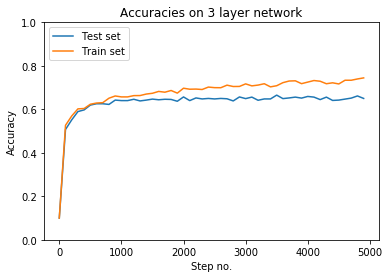

In [5]:
indexes = np.linspace(0,49,50)*100
hmaps.test_accuracy_2L.shape
hmaps.train_accuracy_2L.shape
plt.plot(indexes,hmaps.test_accuracy_3L,label="Test set")
plt.plot(indexes,hmaps.train_accuracy_3L,label="Train set")
plt.legend(loc="upper left")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.xlabel("Step no.")
plt.title("Accuracies on 3 layer network")
plt.show()

# Kaggle results:
#### - 2 layer network:
    - accuracy: 0.62913
    - log-loss: 0.23649
#### - 3 layer network:
    - accuracy: 0.59093
    - log-loss: 0.24990

Tpot model did just a tiny amount better on accuracy for the 2 layer network (tpot model accuracy was 0.62964
), while the 3 layer network performed somewhat poorly. A simple explanation for this would be that deep learning networks work extremly well when it comes to very large amounts of data, so the simpler model (2 layer one) was able to generalize a bit better, enethough the top accuracies for the "offline" case belong to the 3 layer model.